Attribute selection has been a very active research topic for the past decade in the fields of artificial learning, data mining, image processing, and data analysis in bioinformatics. It consists in choosing from a large set of attributes, a subset of attributes interesting for the problem studied. we will talk in this lab about the selection of attributes made for supervised classification. In this case, the goal of the selection is to find an optimal subset of attributes that have the following properties:                                                 
it must be composed of relevant attributes and must seek to avoid redundant attributes. In addition, this set must make it possible to best meet the objective set, namely the accuracy of learning, the speed of learning or even the applicability of the proposed classifier. In this tp, we have chosen to study, the genetic algorithm which is belong to the family of evolutionary algorithms. using KNN recursively to select an optimal subset of attributes.
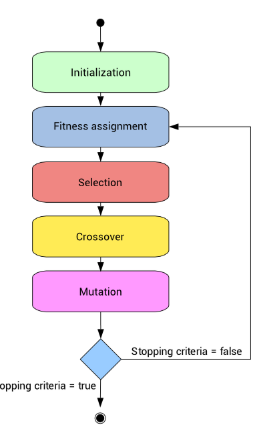
the K-NN (K-nearest neighbors) algorithm is a method of supervised learning. It can be used for both regression and classification. Its operation can be compared to the following analogy "tell me who your neighbors are, I would tell you who you are ...".
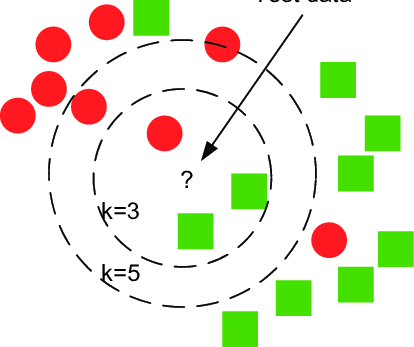
to validate the results we used cross validation,
The aim of cross-validation is to define a set of data enabling the model to be tested during the learning phase (i.e. a set of validation data) in order to limit the problems of over-planning, insufficient adjustment and get an overview of how the model will be generalized to an independent dataset.
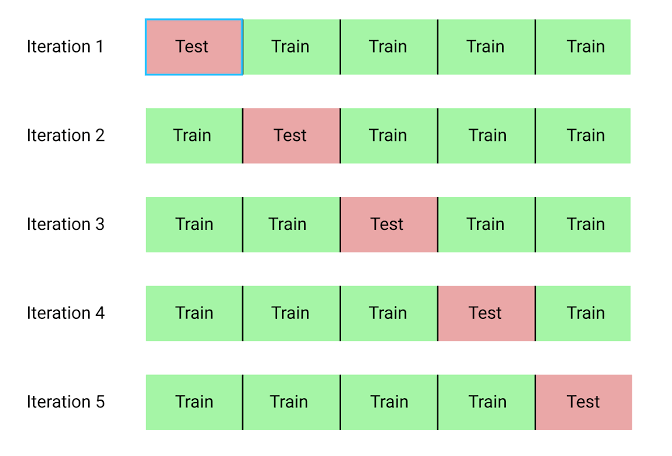

we used 5 datasets:
1-heart_stat contains 13 more class attributes and 270 lines
2-vehicle contains 18 more class attributes and 846 lines
3-darmatology contains 34 more class attributes and 366 lines
4-arrhythmia contains 279 more class attributes and 452 lines
5-colon_cancer contains 2000 more class attributes and 62 lines
 

the solutions have been represented in the form of binary vectors, for example [1,0,1,0,1,0,1,1]
1 i.e. the attribute exists, 0 no


Our algorithm is a sequence of instructions, we have based on the library scikit learn, random, math, pandas numpy, matplotib and time, using 7 functions plus main:
    
1-read.

2-randSelection.

3-population.

4-getFitness.

5-fit_pop.

6-cross.

7-mutate.

8-main.

current directory

In [2]:
from os import chdir
chdir('C:\\Users\\SIDALI\\Desktop\\tp_méta\\genetic')

libraries:

In [7]:
import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import time

C:\Users\SIDALI\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


function to read dataset which takes the name of dataset and return 4 values, the number of attributes and attributes names and classes plus dataset

In [5]:
import pandas as pd

def read(filename):
    df = pd.read_csv(filename,encoding="latin_1")
    attributes = df.drop('class',axis=1)
    label = df['class']
    
    return(len(attributes.columns),attributes.columns,label,df)
    
aa , bb , cc ,dd =read('1heart_stat.csv')
print(aa ,bb,cc,dd)



13 Index(['age', 'sex', 'chest', 'resting_blood_pressure', 'serum_cholestoral',
       'fasting_blood_sugar', 'resting_electrocardiographic_results',
       'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',
       'slope', 'number_of_major_vessels', 'thal'],
      dtype='object') 0      present
1       absent
2      present
3       absent
4       absent
5       absent
6      present
7      present
8      present
9      present
10      absent
11      absent
12      absent
13     present
14      absent
15      absent
16     present
17     present
18      absent
19      absent
20     present
21      absent
22      absent
23      absent
24      absent
25      absent
26      absent
27      absent
28     present
29      absent
        ...   
240    present
241     absent
242     absent
243    present
244     absent
245    present
246    present
247     absent
248    present
249    present
250    present
251     absent
252    present
253     absent
254     absent
255     ab

random selection function which the size of vectors and return vectors

In [8]:
def randSelection(x):
    return [random.randint(0, 1) for i in range(x)]

x = randSelection(10)
y = randSelection(10)
print(x,y)
 

[1, 0, 0, 0, 1, 0, 0, 1, 0, 0] [1, 0, 1, 1, 1, 1, 0, 1, 1, 0]


function to creat population which takes pop_initial size (number of vectors) and the size of vectors and return the population.

In [9]:
def population(pop_initial,size_vec):

    k = 1
    pop = []
    while (k <= pop_initial):
        parent_k = randSelection(size_vec)    
        pop.append(parent_k)
        k += 1
    return(pop)

p = population(10,9)
p

[[1, 1, 0, 1, 1, 0, 1, 0, 1],
 [0, 1, 1, 1, 0, 1, 0, 1, 1],
 [0, 0, 0, 1, 0, 0, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 0, 1, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1]]

getfitness function which takes 4 parameter ,dataset and vector and attributes size plus the k number of neighbors in the KNN and number for cross validation,to return the average vector accuracy.

In [7]:
def getFitness(dataset, vector_1,w,k,nb_cv):    #nb_cv nombre de cross validation 
    i = 0
    
    y = dataset.iloc[:, w].values  # choisir seulementt les classes
    #print(y)
    chose_columns = []             #pour connait la place des colonnes qui ont 1 ex: 2 , 4 ,5
    while(i < len(vector_1)):
        if(vector_1[i] == 1):
            chose_columns.append(i)
        i += 1
        
    #print(chose_columns)
    
    
    # all features
    X = dataset.iloc[:, chose_columns].values     #pour construire une dataset contient seulement les attributs sélectionné
                                                  #dans le vector_1
    #print(X)
    
    
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv=nb_cv, scoring='accuracy')
    #print(y_pred)
    
    return(scores.mean())     # pour retourner la moyenne accuracy

fit_1 = getFitness(dd, x,10,5,5)
fit_1

0.6778933994028333

fit_pop function which takes dataste and  population and vector size and K and number for cross validation to return a population (each vector has its accuracy)

In [8]:
def fit_pop(dataset,population,size_vec,k,nb_cv):

    dafa = pd.DataFrame(columns=['accuracy','parents'])
    l = 0
    while ( l < len(population)):
        fit = getFitness(dataset, population[l],size_vec,k,nb_cv)       #evaluation pour chaque indivdu
        dafa.loc[l] = [fit ]+ [population[l]] 
        l +=1
    
    return(dafa)
        
        
dataframe = fit_pop(dd,p,10,5,5)
dataframe.head(20)

,accuracy,parents
0,0.585208,"[0, 1, 0, 0, 1, 0, 1, 1, 0]"
1,0.648668,"[0, 1, 1, 1, 0, 0, 0, 1, 1]"
2,0.630766,"[1, 0, 0, 0, 1, 1, 1, 1, 0]"
3,0.511391,"[1, 1, 0, 1, 0, 1, 0, 0, 0]"
4,0.630623,"[0, 0, 0, 1, 0, 1, 0, 1, 0]"
5,0.503911,"[1, 1, 1, 1, 0, 1, 1, 0, 0]"
6,0.648738,"[1, 0, 0, 0, 1, 1, 0, 1, 0]"
7,0.592823,"[0, 1, 1, 1, 1, 1, 1, 1, 1]"
8,0.555636,"[0, 0, 1, 1, 1, 1, 1, 0, 1]"
9,0.648738,"[1, 0, 0, 0, 1, 1, 0, 1, 0]"


crossing function which takes two vector and crosses uni_point between this two vectors to return two new vectors
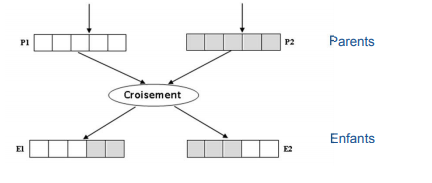

In [9]:
def cross(vector_1, vector_2,pro_cross):    # pro_cross probabilitie de croisement 
    
    vector_3 = []
    vector_4 = []
    
    if (random.random() <=pro_cross):
        i = 0
        while(i < len(vector_1)//2):
            vector_3.append(vector_1[i])
            vector_4.append(vector_2[i])
            i +=1
            

        j = ((len(vector_1)//2))
        while(j < (len(vector_2))):
            vector_3.append(vector_2[j])
            vector_4.append(vector_1[j])
            j +=1
    else:
        vector_3 = vector_1
        vector_4 = vector_2
            
    return(vector_3,vector_4)

xx = [5,5,5,5,5,2,2,2,2,2,2]
yy = [1,1,1,1,1,3,3,3,3,3,3]
cross(xx,yy,0.8)

([5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3], [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

mutate function which takes one vector and his size to modify a bit(random choice) from 1 to 0 or 0 to 1 

In [10]:
def mutate(vector_1,x,prob_muta):      #prob_muta probabiitie de mutation 
    
    if (random.random() <= prob_muta):
        v = x-1
        flip_bit = random.randint(0, v)
        vector_1[flip_bit] = 1-vector_1[flip_bit]
    return (vector_1)

print(x)
mutate(x,5,0.05)


[0, 1, 0, 0, 0, 1, 0, 0, 1, 1]


[0, 1, 0, 0, 0, 1, 0, 0, 1, 1]

main function which takes 4 parameter, dataset and K and population size and number for cross validation to return best attributes

--- génération 1 ---

    accuracy                                  parents
28  0.840741  [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]
3   0.822222  [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1]
34  0.811111  [0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]
19  0.811111  [1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1]
31  0.811111  [1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0]
38  0.807407  [0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1]
36  0.800000  [0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1]
14  0.800000  [1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1]
39  0.796296  [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0]
4   0.796296  [0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1]
6   0.796296  [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1]
10  0.796296  [0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1]
26  0.796296  [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1]
27  0.796296  [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]
1   0.796296  [1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0]
18  0.796296  [0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0]
32  0.796296  [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1]
2   0.

--- génération 5 ---

    accuracy                                  parents
3   0.851852  [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
39  0.848148  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1]
38  0.848148  [1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1]
15  0.840741  [0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1]
5   0.840741  [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
33  0.840741  [1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
35  0.833333  [1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]
28  0.833333  [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1]
25  0.833333  [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]
31  0.825926  [1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1]
11  0.825926  [1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1]
24  0.825926  [1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1]
27  0.825926  [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1]
7   0.825926  [0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1]
10  0.822222  [1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1]
2   0.822222  [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1]
36  0.822222  [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1]
26  0.

--- génération 9 ---

    accuracy                                  parents
34  0.851852  [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
37  0.851852  [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0]
29  0.848148  [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
2   0.848148  [0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1]
16  0.848148  [1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]
1   0.840741  [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
18  0.840741  [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1]
31  0.837037  [1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1]
28  0.837037  [0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1]
20  0.837037  [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]
36  0.833333  [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1]
22  0.829630  [1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]
19  0.829630  [1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1]
10  0.825926  [1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1]
24  0.825926  [1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1]
15  0.825926  [1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0]
30  0.825926  [0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
13  0.

--- génération 13 ---

    accuracy                                  parents
39  0.851852  [1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
38  0.851852  [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
30  0.848148  [1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
23  0.848148  [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1]
9   0.848148  [1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1]
16  0.844444  [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
29  0.840741  [1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1]
25  0.840741  [0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]
17  0.840741  [1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1]
36  0.840741  [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]
15  0.837037  [0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
21  0.837037  [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1]
20  0.837037  [1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]
11  0.837037  [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1]
0   0.833333  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1]
3   0.833333  [0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1]
22  0.833333  [1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1]
35  0

--- génération 17 ---

    accuracy                                  parents
38  0.855556  [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
39  0.851852  [1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1]
21  0.851852  [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
14  0.851852  [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
36  0.840741  [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]
15  0.840741  [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
12  0.837037  [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1]
37  0.837037  [0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
16  0.837037  [0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1]
20  0.837037  [0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
24  0.833333  [1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
2   0.833333  [1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1]
28  0.833333  [0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]
30  0.833333  [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]
0   0.829630  [1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1]
27  0.829630  [1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]
18  0.825926  [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1]
7   0

--- génération 21 ---

    accuracy                                  parents
39  0.855556  [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
38  0.855556  [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
12  0.851852  [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1]
30  0.851852  [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
29  0.851852  [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1]
8   0.851852  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
6   0.848148  [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
1   0.848148  [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
10  0.844444  [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
11  0.840741  [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
28  0.837037  [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]
22  0.833333  [1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]
34  0.833333  [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]
23  0.833333  [1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1]
26  0.829630  [1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1]
37  0.829630  [0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]
14  0.829630  [0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]
9   0

--- génération 25 ---

    accuracy                                  parents
38  0.855556  [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
13  0.848148  [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
23  0.848148  [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
31  0.848148  [1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
7   0.848148  [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1]
12  0.848148  [1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]
11  0.844444  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
29  0.844444  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
1   0.844444  [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1]
26  0.844444  [1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
35  0.840741  [1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1]
8   0.840741  [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1]
4   0.837037  [1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1]
37  0.833333  [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]
24  0.833333  [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
39  0.833333  [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
33  0.829630  [0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1]
27  0

--- génération 29 ---

    accuracy                                  parents
38  0.855556  [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
39  0.851852  [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
11  0.848148  [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1]
20  0.844444  [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]
15  0.840741  [1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1]
28  0.840741  [1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1]
21  0.840741  [1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1]
22  0.840741  [1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
30  0.837037  [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]
5   0.837037  [1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1]
3   0.837037  [0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1]
17  0.837037  [0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
36  0.829630  [0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1]
29  0.829630  [1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1]
0   0.829630  [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
14  0.829630  [0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1]
13  0.829630  [1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1]
32  0

--- génération 33 ---

    accuracy                                  parents
38  0.855556  [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
39  0.848148  [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
32  0.848148  [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
17  0.848148  [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
16  0.840741  [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1]
10  0.837037  [1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1]
1   0.837037  [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1]
14  0.837037  [1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1]
20  0.837037  [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1]
21  0.833333  [1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]
34  0.829630  [1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1]
9   0.829630  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
35  0.825926  [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1]
18  0.822222  [1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1]
11  0.822222  [0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]
13  0.822222  [1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]
30  0.822222  [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1]
5   0

--- génération 37 ---

    accuracy                                  parents
38  0.855556  [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
27  0.848148  [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
30  0.848148  [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
39  0.844444  [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
32  0.844444  [0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1]
14  0.844444  [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
37  0.844444  [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1]
26  0.844444  [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
8   0.844444  [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]
6   0.840741  [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1]
3   0.840741  [1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]
18  0.840741  [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1]
24  0.837037  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1]
19  0.837037  [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]
17  0.833333  [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1]
33  0.833333  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1]
35  0.833333  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1]
0   0

--- génération 41 ---

    accuracy                                  parents
39  0.851852  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
11  0.851852  [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
38  0.851852  [1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
37  0.851852  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
22  0.851852  [1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
21  0.851852  [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
7   0.851852  [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
18  0.851852  [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]
5   0.848148  [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
17  0.844444  [1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1]
20  0.837037  [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1]
36  0.833333  [1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]
1   0.833333  [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
6   0.833333  [1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1]
25  0.829630  [0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]
29  0.825926  [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1]
15  0.822222  [0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1]
28  0

--- génération 45 ---

    accuracy                                  parents
39  0.855556  [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
38  0.855556  [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
26  0.855556  [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]
13  0.855556  [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
7   0.855556  [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
23  0.851852  [1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
28  0.848148  [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
17  0.844444  [1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1]
10  0.844444  [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
34  0.840741  [0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]
16  0.837037  [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1]
18  0.837037  [1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1]
6   0.837037  [0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1]
36  0.837037  [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1]
14  0.833333  [1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1]
9   0.833333  [0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1]
4   0.833333  [1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1]
2   0

--- génération 49 ---

    accuracy                                  parents
33  0.855556  [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
14  0.851852  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
29  0.848148  [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
35  0.848148  [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
12  0.844444  [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
9   0.844444  [1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1]
38  0.844444  [1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1]
22  0.840741  [1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1]
37  0.840741  [1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1]
34  0.840741  [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1]
8   0.840741  [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
19  0.837037  [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1]
39  0.837037  [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1]
17  0.833333  [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]
6   0.833333  [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1]
26  0.833333  [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1]
11  0.833333  [1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1]
16  0

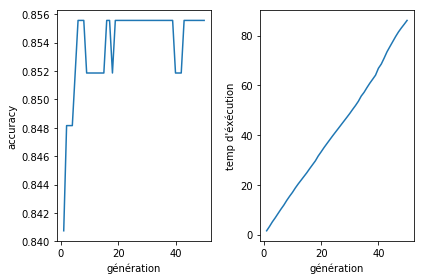

In [27]:
def main(dataset,k,pop_initial,nb_cv):
    a,b,c,d = read(dataset)
    
    popu = population(pop_initial,a)
    
    x_values = list()
    y_values = list()
    y_values1 = list()


    génération = 1
    ti = 0
    t2 = 0
    
    
    while (génération <= 50):
        start_time = time.time()
        
        df = fit_pop(d,popu,a,k,nb_cv)
        df = df.sort_values(by=['accuracy'],ascending = False)
        
        df_ln = len(df)
        size = int(df_ln/2)       
        #print(size)
        
        new_parent = []
        new_parent = df.head(size)  # highest
        
        #print(new_parent)
            
        z = 0
        cross_list = []                        #croisement one_point
        while( z < (int((df_ln-(0.05*df_ln)))//2)):
            t,v =random.sample(range(0,size),2)
            crossover_1 ,crossover_2 = cross(new_parent.iloc[t,1], new_parent.iloc[v,1],0.8)
            cross_list.extend([crossover_1,crossover_2])
            z += 1
        #print(cross_list)
    
        w = 0  
        mutate_list = []
        while (w < len(cross_list)):       #mutate one bit
            mutate_list.append(mutate(cross_list[w],a,1))
            w += 1
        #print(mutate_list)
            
        popu = []
        for zz in mutate_list:
            popu.append(zz)
            
        new_size = len(df) - len(popu)
        #print(new_size)
            
        jj = 0                          #pour ajouter 0.05 de la population précedente a la nouvelle population
        while(jj < new_size):
            popu.append(new_parent.iloc[jj,1])
            jj += 1
                
        #print(popu)  
        
    
            
        fn = time.time()                    # pour calculer le temps de chaque génération
        t = (fn - start_time)
        t2 = t2 + t                                
    
        print("--- génération %s ---" %génération )
        print()
        #pd.options.display.max_columns = None
        #display(df)
        print(df)
        print()
        print("--- accuracy %s ---" % df.iloc[0,0])
        print()
    
        print("--- %s seconds ---" % t2)
        print()
    
    
    
        attr = popu[0]
        #print(attr)
        
        list_att = []
        q = 0
        while(q < a):                        # pour retourrner les noms des attribus sélectionné
            if (attr[q] == 1):
                list_att.append(b[q])
            q +=1
        print(len(list_att))
        print(list_att)
        print()
    
    
    
        # pour les plots
        x_values.append(génération)
        y_values.append(df.iloc[0,0])
        y_values1.append(t2)
    
         
        génération += 1
    
 
     
    plt.figure()                     #pour tracer les courbes
    plt.subplot(1, 2, 1)
    plt.plot(x_values, y_values)     
    plt.xlabel('génération')
    plt.ylabel('accuracy')


    plt.subplot(1, 2, 2)
    plt.plot(x_values, y_values1)
    plt.xlabel('génération')
    plt.ylabel("temp d'éxécution")
    plt.tight_layout()
    
main('5colon_cancer.csv',5,40,5)